In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import geopandas as gpd
from geopandas.tools import sjoin

### SE USA

In [3]:
# dfSEUS = pd.read_csv('../../../analysis/SEusa/model_data_out/ML_slope_wave_atlantic_2022-05-18_Data_Post2012_VerifiedOnshore_0.0015_right_transects_model_stratsample-by-lat.csv')
# dfSEUS = pd.read_csv('../model_data/ML_slope_wave_atlantic_2022-05-18_Data_Post2012_VerifiedOnshore_0.0015_right_transects_model_stratsample-by-lat.csv')
# dfSEUS = pd.read_csv('../model_data/ML_slope_wave_atlantic_2022-08-31_Data_Post2012_VerifiedOnshore_0.0015_right_transects_model_stratsample-by-lat.csv')
# dfSEUS = pd.read_csv('../model_data/ML_slope_wave_atlantic_2022-9-4_Data_Post2012_VerifiedOnshore_0.0015_right_transects_model_stratsample-by-lat.csv')

In [139]:

dfSEUS = pd.read_csv('../model_data/ML_slope_wave_atlantic_2022-9-7_Data_Post2012_VerifiedOnshore_0.0015_right_transects_model_stratsample-by-lat-by-gs.csv')

In [140]:
len(dfSEUS)

350

In [141]:
dfSEUS['d50'].max()

1.398605927

In [142]:
dfSEUS['d50'].min()

0.090577125

In [143]:
# df_strat_gs = dfSEUS.copy()

# num_cats=11
# num_samples_per_category = 30

# df_strat_gs['category'] = pd.cut(df_strat_gs['d50'], num_cats)
# df_strat_gs = df_strat_gs.groupby(['category']).apply(lambda x: x.sample(num_samples_per_category, replace = True)).reset_index(drop = True)

# len(df_strat_gs)

In [144]:
# df_strat_gs['category']

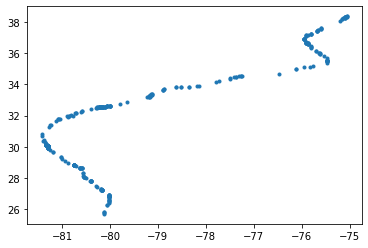

In [145]:
plt.plot(dfSEUS['longitude'], dfSEUS['latitude'], '.')
# plt.plot(df_strat_gs['longitude'], df_strat_gs['latitude'], 'ro')

In [146]:
# dfSEUS = df_strat_gs.copy()
# len(dfSEUS)

In [147]:
dfSEUS['code'] = np.ones(len(dfSEUS))

In [149]:
dfSEUS = dfSEUS[['latitude', 'longitude', 'd50',
        'beach_slope_average', 'mstr', 'code', 'dataset',
         'hs_mean', 'dir', 'tp']].copy() #'hs_max',

In [150]:
dfSEUS.to_csv('../model_data/dataset_SE_US_coast_strat_gs.csv')

In [151]:
rand = np.random.randn(len(dfSEUS))
np.save('../model_out/SEUS_rand.npy', rand, allow_pickle=True)

# rand = np.load('../model_out/SEUS_rand.npy', allow_pickle=True)


In [152]:
(dfSEUS['d50'].min(), dfSEUS['d50'].max())

(0.090577125, 1.398605927)

### E Australia

In [153]:
dataset = '../../../orig_data/australia/dataset_Australia_East_coast.geojson'

dfOz = gpd.read_file(dataset)

# dfOz = dfOz[dfOz['d50']<=.9] #2
len(dfOz)

sources = ['Short (2022)' for k in dfOz['d50']]


In [154]:
len(dfOz)

279

In [155]:
dfOz['dataset'] = sources

In [156]:
dfOz.head()

,beach_id,beach_slope_average,width_ci_average,quality_flag,mstr,hsig_median,prc_mstr_obs,min_tide_obs,max_tide_obs,sl_points_average,...,distance_to_sample,latitude,longitude,Hs_mean,Hs_max,Tp_mean,Wdir_mean,Wdir_weighted_mean,geometry,dataset
0,aus0011,0.060145,0.0161,High,2.068996,0.708,90.97,-0.697446,1.184659,673.0,...,0.000000,-25.854332,153.078347,1.565813,4.754424,8.719285,112.555036,117.47011,"LINESTRING (153.07112 -25.81160, 153.07118 -25...",Short (2022)
1,aus0012,0.082709,0.0335,Medium,2.068996,0.616,92.14,-0.721615,1.184659,402.0,...,8.371863,-25.932753,153.134103,1.565813,4.754424,8.719285,112.555036,117.47011,"LINESTRING (153.08974 -25.89640, 153.08979 -25...",Short (2022)
2,aus0013,0.060027,0.0164,High,2.058574,1.294,88.94,-0.652368,1.178532,369.0,...,57.922081,-26.008686,153.153149,1.565813,4.754424,8.719285,112.555036,117.47011,"LINESTRING (153.18804 -25.93697, 153.18795 -25...",Short (2022)
3,aus0014,0.054012,0.0139,High,2.050147,1.172,88.16,-0.650809,1.156622,394.0,...,61.914900,-26.157750,153.097286,1.565813,4.754424,8.719285,112.555036,117.47011,"LINESTRING (153.12230 -26.08255, 153.12227 -26...",Short (2022)
4,aus0015,0.049932,0.0087,High,2.045488,1.152,89.20,-0.650148,1.174339,425.0,...,27.051000,-26.311676,153.068419,1.565813,4.754424,8.719285,112.555036,117.47011,"LINESTRING (153.07537 -26.23401, 153.07535 -26...",Short (2022)


In [157]:

ind = np.where(dfOz['quality_flag']!='Low')[0]
len(ind)
dfOz = dfOz.iloc[ind]
len(dfOz)

ind = np.where(dfOz['distance_to_sample']<1000)[0]
len(ind)
dfOz = dfOz.iloc[ind]
len(dfOz)

dfOz = dfOz.dropna()
# df.head()
len(dfOz)

dfOz.rename(columns = {'Hs_max':'hs_max', 'Hs_mean':'hs_mean', 'Tp_mean': 'tp', 'Wdir_mean':'dir'}, inplace = True)
dfOz.to_csv('../model_data/dataset_Australia_East_coast_nostrat.csv')

In [158]:
df_strat_gs = dfOz.copy()

num_cats=6
num_samples_per_category = 40

df_strat_gs['category'] = pd.cut(df_strat_gs['d50'], num_cats)
df_strat_gs = df_strat_gs.groupby(['category']).apply(lambda x: x.sample(num_samples_per_category, replace = True)).reset_index(drop = True)

len(df_strat_gs)

240

In [159]:
df_strat_gs['category']

0      (0.118, 0.258]
1      (0.118, 0.258]
2      (0.118, 0.258]
3      (0.118, 0.258]
4      (0.118, 0.258]
            ...      
235    (0.814, 0.953]
236    (0.814, 0.953]
237    (0.814, 0.953]
238    (0.814, 0.953]
239    (0.814, 0.953]
Name: category, Length: 240, dtype: category
Categories (6, interval[float64, right]): [(0.118, 0.258] < (0.258, 0.397] < (0.397, 0.536] < (0.536, 0.675] < (0.675, 0.814] < (0.814, 0.953]]

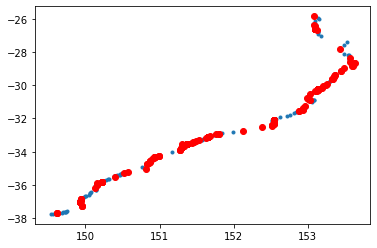

In [160]:
plt.plot(dfOz['longitude'], dfOz['latitude'], '.')
plt.plot(df_strat_gs['longitude'], df_strat_gs['latitude'], 'ro')

In [161]:
dfEAus = df_strat_gs.copy()
len(dfEAus)

240

In [162]:
dfEAus['code'] = np.zeros(len(dfEAus))

In [163]:
dfEAus = dfEAus[['latitude', 'longitude', 'd50',
        'beach_slope_average', 'mstr', 'code', 'dataset',
         'hs_mean', 'dir', 'tp']].copy() #'hs_max',

In [164]:
dfEAus.to_csv('../model_data/dataset_E_Aus_coast_strat_gs.csv')

In [165]:
rand = np.random.randn(len(dfEAus))
np.save('../model_out/EAus_rand.npy', rand, allow_pickle=True)

# rand = np.load('../model_out/EAus_rand.npy', allow_pickle=True)


In [166]:
(dfEAus['d50'].min(), dfEAus['d50'].max())

(0.1425, 0.95264)

### S Cali

In [182]:
dfSCali = pd.read_csv('../../../orig_data/US_S_CA/SoCal_GrainSize_waves_slopes_tide_merged.csv')
dfSCali = dfSCali[dfSCali['Grain_Size']<2] 
dfSCali = dfSCali[dfSCali['Grain_Size']>.064] 

In [183]:
np.unique(dfSCali['Ele'])

array(['BB', 'BF', 'MB', 'O'], dtype=object)

In [184]:
dfSCali = dfSCali[(dfSCali['Ele']=='BF') | (dfSCali['Ele']=='MB')]
dfSCali = dfSCali.dropna()

In [185]:
len(dfSCali)

971

In [186]:
df_strat_gs = dfSCali.copy()

num_cats=11
num_samples_per_category = 25

df_strat_gs['category'] = pd.cut(df_strat_gs['Grain_Size'], num_cats)
df_strat_gs = df_strat_gs.groupby(['category']).apply(lambda x: x.sample(num_samples_per_category, replace = True)).reset_index(drop = True)

len(df_strat_gs)

275

In [187]:
df_strat_gs.keys()

Index(['Unnamed: 0', 'Ele', 'dataset', 'Grain_Size', 'Hs', 'Tp', 'Ta', 'Dp',
       'Da', 'Ea', 'Es', 'geometry', 'Lon', 'Lat', 'Beach face slope',
       'index_right', 'MEAN_SIG_WAVEHEIGHT', 'TIDAL_RANGE', 'ERODIBILITY',
       'CHLOROPHYLL', 'TURBIDITY', 'REGIONAL_SINUOSITY',
       'OUTFLOW_DENSITY_RESCALED', 'category'],
      dtype='object')

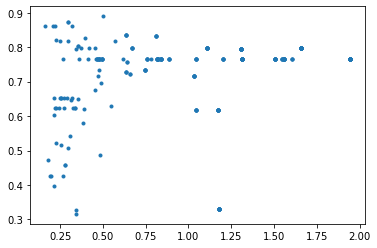

In [188]:
plt.plot(df_strat_gs['Grain_Size'], df_strat_gs['Hs'],'.')
# plt.plot(df_strat_gs['Grain_Size'], df_strat_gs['MEAN_SIG_WAVEHEIGHT'],'r.')

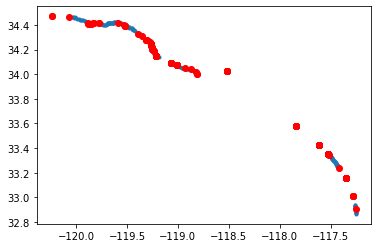

In [189]:
plt.plot(dfSCali['Lon'], dfSCali['Lat'], '.')
plt.plot(df_strat_gs['Lon'], df_strat_gs['Lat'], 'ro')

In [190]:
dfSCali = df_strat_gs.copy()
len(dfSCali)

275

In [191]:
dfSCali.rename(
    columns = {'Beach face slope':'beach_slope_average', 
               'Grain_Size':'d50', 
               'Hs':'hs_mean', 
               'Tp': 'tp', 
               'Dp':'dir', 
               'Lat':'latitude', 
               'Lon':'longitude', 
               'TIDAL_RANGE':'mstr'}, 
    inplace = True)


In [192]:
dfSCali['code'] = np.ones(len(dfSCali))*2

In [193]:
dfSCali = dfSCali[['latitude', 'longitude', 'd50', 'beach_slope_average', 'mstr', 'code','dataset',
       'hs_mean', 'dir', 'tp']]
dfSCali.keys()

Index(['latitude', 'longitude', 'd50', 'beach_slope_average', 'mstr', 'code',
       'dataset', 'hs_mean', 'dir', 'tp'],
      dtype='object')

In [194]:
dfSCali.head()

,latitude,longitude,d50,beach_slope_average,mstr,code,dataset,hs_mean,dir,tp
0,34.027495,-118.518082,0.219214,0.075,2.498016,2.0,SC_Beach,0.623917,215.935221,13.461906
1,34.390243,-119.516805,0.216600,0.080,2.517412,2.0,Barnard_Santa_Barbara,0.603160,223.900787,11.949159
2,34.470247,-120.239018,0.181071,0.125,2.443020,2.0,SC_Beach,0.471879,190.163111,13.503772
3,33.011980,-117.278044,0.220855,0.055,2.473679,2.0,SC_Beach,0.860833,255.933207,13.742938
4,33.011980,-117.278044,0.164084,0.055,2.473679,2.0,SC_Beach,0.860833,255.933207,13.742938


In [195]:
dfSCali.to_csv('../model_data/dataset_S_CA_coast_strat_gs.csv')

In [196]:
rand = np.random.randn(len(dfSCali))
np.save('../model_out/SCA_rand.npy', rand, allow_pickle=True)

# rand = np.load('../model_out/SCA_rand.npy', allow_pickle=True)


In [197]:
(dfSCali['d50'].min(), dfSCali['d50'].max())

(0.164083628, 1.942912168)

### merge 3 regions

In [198]:
df = pd.concat([dfSEUS, dfEAus, dfSCali], ignore_index=True)
df = df.dropna()
len(df)

865

In [199]:
print(np.sum(df.code==0))
print(np.sum(df.code==1))
print(np.sum(df.code==2))

240
350
275


In [200]:
df.to_csv('../model_data/dataset_SEUS_EAus_SCA_strat-by-gs.csv')

In [201]:
rand = np.random.randn(len(df))
np.save('../model_out/SEUS_EOz_SCA_rand.npy', rand, allow_pickle=True)

# rand = np.load('../model_out/SEUS_EOz_SCA_rand.npy', allow_pickle=True)


### whole Aus

In [202]:
dataset = '../../../orig_data/australia/dataset_Australia_all.geojson'

dfOz = gpd.read_file(dataset)

dfOz = dfOz[dfOz['d50']<=1] #2
len(dfOz)

ind = np.where(dfOz['quality_flag']!='Low')[0]
len(ind)
dfOz = dfOz.iloc[ind]
len(dfOz)


ind = np.where(dfOz['distance_to_sample']<1000)[0]
len(ind)
dfOz = dfOz.iloc[ind]
len(dfOz)

dfOz = dfOz.dropna()
len(dfOz)

dfOz.rename(columns = {'Hs_max':'hs_max', 'Hs_mean':'hs_mean', 'Tp_mean': 'tp', 'Wdir_mean':'dir'}, inplace = True)

In [203]:
dfOz.to_csv('../model_data/dataset_whole_Aus_coast_no_strat.csv')

In [204]:

df_strat_gs = dfOz.copy()

num_cats=10
num_samples_per_category = 30

df_strat_gs['category'] = pd.cut(df_strat_gs['d50'], num_cats)
df_strat_gs = df_strat_gs.groupby(['category']).apply(lambda x: x.sample(num_samples_per_category, replace = True)).reset_index(drop = True)

len(df_strat_gs)

300

In [205]:
df_strat_gs['category']

0      (0.0907, 0.182]
1      (0.0907, 0.182]
2      (0.0907, 0.182]
3      (0.0907, 0.182]
4      (0.0907, 0.182]
            ...       
295     (0.903, 0.993]
296     (0.903, 0.993]
297     (0.903, 0.993]
298     (0.903, 0.993]
299     (0.903, 0.993]
Name: category, Length: 300, dtype: category
Categories (10, interval[float64, right]): [(0.0907, 0.182] < (0.182, 0.272] < (0.272, 0.362] < (0.362, 0.452] ... (0.633, 0.723] < (0.723, 0.813] < (0.813, 0.903] < (0.903, 0.993]]

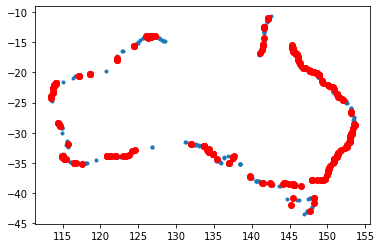

In [206]:
plt.plot(dfOz['longitude'], dfOz['latitude'], '.')
plt.plot(df_strat_gs['longitude'], df_strat_gs['latitude'], 'ro')

In [207]:
dfOz = df_strat_gs.copy()
len(dfOz)

300

In [208]:
dfOz['code'] = np.ones(len(dfOz))*3

In [209]:
dfOz = dfOz[['latitude', 'longitude', 'd50',
        'beach_slope_average', 'mstr', 'code',
         'hs_mean', 'dir', 'tp']].copy() #'hs_max',

In [210]:
dfOz.to_csv('../model_data/dataset_whole_Aus_coast_strat_gs.csv')


In [211]:
rand = np.random.randn(len(dfOz))
np.save('../model_out/WholeAus_rand.npy', rand, allow_pickle=True)

# rand = np.load('../model_out/WholeAus_rand.npy', allow_pickle=True)


### Aus regions

In [50]:
dfOz = pd.read_csv('../model_data/dataset_whole_Aus_coast_no_strat.csv')

dfOz = gpd.GeoDataFrame(
    dfOz, geometry=gpd.points_from_xy(dfOz.longitude, dfOz.latitude))

regions = '../../../orig_data/australia/sediment_compartments/Regions.geojson'
Oz_regions = gpd.read_file(regions)

dfOzregions = sjoin(dfOz, Oz_regions, how='left')

C:\Users\dbuscombe\AppData\Local\Temp\6\ipykernel_16240\1430212546.py:9: UserWarning: CRS mismatch between the CRS of left geometries and the CRS of right geometries.
Use `to_crs()` to reproject one of the input geometries to match the CRS of the other.

Left CRS: None
Right CRS: EPSG:4283

  dfOzregions = sjoin(dfOz, Oz_regions, how='left')


In [51]:
dfOzNE = dfOzregions[dfOzregions['ID_Region']==1]
print(len(dfOzNE))

dfOzSE = dfOzregions[dfOzregions['ID_Region']==2]
print(len(dfOzSE))

dfOzS = dfOzregions[dfOzregions['ID_Region']==3]
print(len(dfOzS))

dfOzW = dfOzregions[dfOzregions['ID_Region']==4]
print(len(dfOzW))

dfOzNW = dfOzregions[dfOzregions['ID_Region']==5]
print(len(dfOzNW))

dfOzCG = dfOzregions[dfOzregions['ID_Region']==6] #Carpentaria Gulf
print(len(dfOzCG))

163
289
179
60
69
49


In [52]:
dfOzCG.to_csv('../model_data/dataset_Australia_GulfCarpentaria_coast_nostrat.csv')
dfOzW.to_csv('../model_data/dataset_Australia_W_coast_nostrat.csv')
dfOzNW.to_csv('../model_data/dataset_Australia_NW_coast_nostrat.csv')
dfOzNE.to_csv('../model_data/dataset_Australia_NE_coast_nostrat.csv')
dfOzSE.to_csv('../model_data/dataset_Australia_SE_coast_nostrat.csv')
dfOzS.to_csv('../model_data/dataset_Australia_S_coast_nostrat.csv')

In [53]:
dfOz = pd.read_csv('../model_data/dataset_whole_Aus_coast_strat_gs.csv')

dfOz = gpd.GeoDataFrame(
    dfOz, geometry=gpd.points_from_xy(dfOz.longitude, dfOz.latitude))

dfOzregions = sjoin(dfOz, Oz_regions, how='left')

C:\Users\dbuscombe\AppData\Local\Temp\6\ipykernel_16240\1029102663.py:6: UserWarning: CRS mismatch between the CRS of left geometries and the CRS of right geometries.
Use `to_crs()` to reproject one of the input geometries to match the CRS of the other.

Left CRS: None
Right CRS: EPSG:4283

  dfOzregions = sjoin(dfOz, Oz_regions, how='left')


In [54]:
dfOzNE = dfOzregions[dfOzregions['ID_Region']==1]
print(len(dfOzNE))

dfOzSE = dfOzregions[dfOzregions['ID_Region']==2]
print(len(dfOzSE))

dfOzS = dfOzregions[dfOzregions['ID_Region']==3]
print(len(dfOzS))

dfOzW = dfOzregions[dfOzregions['ID_Region']==4]
print(len(dfOzW))

dfOzNW = dfOzregions[dfOzregions['ID_Region']==5]
print(len(dfOzNW))

dfOzCG = dfOzregions[dfOzregions['ID_Region']==6] #Carpentaria Gulf
print(len(dfOzCG))

82
59
68
32
48
11


In [55]:
dfOzCG.to_csv('../model_data/dataset_Australia_GulfCarpentaria_coast_strat_gs.csv')
dfOzW.to_csv('../model_data/dataset_Australia_W_coast_strat_gs.csv')
dfOzNW.to_csv('../model_data/dataset_Australia_NW_coast_strat_gs.csv')
dfOzNE.to_csv('../model_data/dataset_Australia_NE_coast_strat_gs.csv')
dfOzSE.to_csv('../model_data/dataset_Australia_SE_coast_strat_gs.csv')
dfOzS.to_csv('../model_data/dataset_Australia_S_coast_strat_gs.csv')

### 4 regions

In [59]:
dfOzCG['code'] = np.ones(len(dfOzCG))*3
dfOzCG = dfOzCG[['latitude', 'longitude', 'd50', 'beach_slope_average', 'mstr', 'code',
       'hs_mean', 'dir', 'tp']]
dfOzCG.keys()

C:\Users\dbuscombe\Anaconda3\envs\cgrasp\lib\site-packages\geopandas\geodataframe.py:1351: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


Index(['latitude', 'longitude', 'd50', 'beach_slope_average', 'mstr', 'code',
       'hs_mean', 'dir', 'tp'],
      dtype='object')

In [60]:
dfOzW['code'] = np.ones(len(dfOzW))*4
dfOzW = dfOzW[['latitude', 'longitude', 'd50', 'beach_slope_average', 'mstr', 'code',
       'hs_mean', 'dir', 'tp']]
dfOzW.keys()

C:\Users\dbuscombe\Anaconda3\envs\cgrasp\lib\site-packages\geopandas\geodataframe.py:1351: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


Index(['latitude', 'longitude', 'd50', 'beach_slope_average', 'mstr', 'code',
       'hs_mean', 'dir', 'tp'],
      dtype='object')

In [61]:
dfOzNW['code'] = np.ones(len(dfOzNW))*5
dfOzNW = dfOzNW[['latitude', 'longitude', 'd50', 'beach_slope_average', 'mstr', 'code',
       'hs_mean', 'dir', 'tp']]
dfOzNW.keys()

C:\Users\dbuscombe\Anaconda3\envs\cgrasp\lib\site-packages\geopandas\geodataframe.py:1351: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


Index(['latitude', 'longitude', 'd50', 'beach_slope_average', 'mstr', 'code',
       'hs_mean', 'dir', 'tp'],
      dtype='object')

In [62]:
dfOzNE['code'] = np.ones(len(dfOzNE))*6
dfOzNE = dfOzNE[['latitude', 'longitude', 'd50', 'beach_slope_average', 'mstr', 'code',
       'hs_mean', 'dir', 'tp']]
dfOzNE.keys()

C:\Users\dbuscombe\Anaconda3\envs\cgrasp\lib\site-packages\geopandas\geodataframe.py:1351: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


Index(['latitude', 'longitude', 'd50', 'beach_slope_average', 'mstr', 'code',
       'hs_mean', 'dir', 'tp'],
      dtype='object')

In [63]:
dfOzS['code'] = np.ones(len(dfOzS))*7
dfOzS = dfOzS[['latitude', 'longitude', 'd50', 'beach_slope_average', 'mstr', 'code',
       'hs_mean', 'dir', 'tp']]
dfOzS.keys()

C:\Users\dbuscombe\Anaconda3\envs\cgrasp\lib\site-packages\geopandas\geodataframe.py:1351: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


Index(['latitude', 'longitude', 'd50', 'beach_slope_average', 'mstr', 'code',
       'hs_mean', 'dir', 'tp'],
      dtype='object')

In [64]:
df = pd.concat([dfSEUS, dfEAus, dfSCali, dfOzCG, dfOzW, dfOzNW, dfOzNE, dfOzS], ignore_index=True)
df = df.dropna()
len(df)

1201

In [65]:
print(np.sum(df.code==0))
print(np.sum(df.code==1))
print(np.sum(df.code==2))
print(np.sum(df.code==3))
print(np.sum(df.code==4))
print(np.sum(df.code==5))
print(np.sum(df.code==6))
print(np.sum(df.code==7))

300
330
330
11
32
48
82
68


In [66]:
df

,latitude,longitude,d50,beach_slope_average,mstr,code,hs_mean,dir,tp
0,26.420860,-80.029502,0.119091,0.101041,1.102508,1.0,0.831507,66.096052,7.237247
1,35.084650,-75.978548,0.166356,0.065867,1.362719,1.0,0.704308,143.216508,7.986052
2,32.725687,-79.825312,0.090577,0.031338,2.026691,1.0,0.488610,135.187447,7.429373
3,35.084650,-75.978548,0.166356,0.065867,1.362719,1.0,0.704308,143.216508,7.986052
4,26.553744,-80.029555,0.119091,0.101041,1.102508,1.0,0.842581,68.655992,7.379679
...,...,...,...,...,...,...,...,...,...
1196,-32.150506,133.685987,0.933030,0.049206,1.922418,7.0,2.043705,213.374532,12.697816
1197,-32.717920,134.107453,0.920190,0.055202,1.864342,7.0,1.404420,216.898720,12.325972
1198,-32.150506,133.685987,0.933030,0.049206,1.922418,7.0,2.043705,213.374532,12.697816
1199,-32.150506,133.685987,0.933030,0.049206,1.922418,7.0,2.043705,213.374532,12.697816


In [67]:
df.to_csv('../model_data/dataset_SEUS_EAus_SCA_wholeAus_strat.csv')

In [68]:
rand = np.random.randn(len(df))
np.save('../model_out/SEUS_EOz_SCA_wholeAus_rand.npy', rand, allow_pickle=True)

# rand = np.load('../model_out/SEUS_EOz_SCA_wholeAus_rand.npy', allow_pickle=True)


### Northern Ireland

In [97]:
dfNI = pd.read_csv('../../../orig_data/NorthernIreland/Jackson_NIre.csv')

In [98]:
dfNI.rename(
    columns = {'Intertidal slope':'beach_slope_average', 'D50 (mm)':'d50', 'H0 (mean Hs)':'hs_mean', 'T (mean, s)': 'tp', 'MSTR (m)':'mstr'}, 
    inplace = True)

dfNI['code'] = np.ones(len(dfNI))*8

dfNI = dfNI[['latitude', 'longitude', 'd50', 'beach_slope_average', 'mstr', 'code',
       'hs_mean', 'tp']]
dfNI.keys()

Index(['latitude', 'longitude', 'd50', 'beach_slope_average', 'mstr', 'code',
       'hs_mean', 'tp'],
      dtype='object')

In [99]:
(dfNI['latitude'].min(), dfNI['latitude'].max())

(54.0626664, 55.2869665)

In [100]:
(dfNI['longitude'].min(), dfNI['longitude'].max())

(-8.443956, -5.468761)

In [101]:
dfNI.to_csv('../model_data/dataset_NI.csv')

In [105]:
rand = np.random.randn(len(dfNI))
np.save('../model_out/NI_rand.npy', rand, allow_pickle=True)


In [118]:
dfNI

,latitude,longitude,d50,beach_slope_average,mstr,code,hs_mean,tp
0,54.554352,-8.209775,0.140,0.0139,3.3,8.0,2.18,6.88
1,54.841990,-8.443956,0.180,0.0218,3.4,8.0,2.18,6.88
2,55.152830,-8.155428,0.210,0.0202,3.4,8.0,2.18,6.88
3,55.192982,-7.836669,0.140,0.0134,3.4,8.0,2.18,6.88
4,55.286966,-7.166544,0.230,0.0446,2.9,8.0,2.18,6.88
5,55.149232,-6.911044,0.190,0.0375,1.6,8.0,2.18,6.88
6,55.163580,-6.877427,0.157,0.0194,1.6,8.0,2.05,6.89
7,55.164820,-6.788414,0.166,0.0214,1.5,8.0,2.26,7.11
8,55.182910,-6.718701,0.157,0.0246,1.5,8.0,2.26,7.11
9,55.202304,-6.655600,0.186,0.0320,1.5,8.0,2.34,7.17


In [ ]:
# stratification deosnt really make sense for this dataset, 
# but boosts up to N=100 (from N=24) while almost retaining original unique value distributions

In [143]:
len(np.unique(dfNI['d50'].values))

23

In [151]:
df_strat_gs = dfNI.copy()

num_cats=2
num_samples_per_category = len(dfNI)*2

df_strat_gs['category'] = pd.cut(df_strat_gs['d50'], num_cats)
df_strat_gs = df_strat_gs.groupby(['category']).apply(lambda x: x.sample(num_samples_per_category, replace = True)).reset_index(drop = True)

len(df_strat_gs)

100

In [152]:
len(np.unique(df_strat_gs['d50'].values))

22

In [159]:
unique , unique_counts   = np.unique(df_strat_gs['d50'].values, return_counts=True)

In [161]:
unique

array([0.137, 0.14 , 0.141, 0.157, 0.166, 0.169, 0.17 , 0.18 , 0.186,
       0.19 , 0.197, 0.21 , 0.214, 0.218, 0.229, 0.23 , 0.233, 0.248,
       0.28 , 0.286, 0.397, 0.634])

In [160]:
unique_counts

array([ 1,  7,  1,  6,  3,  2,  4,  2,  2,  1,  3,  1,  3,  2,  1,  3,  3,
        1,  2,  2, 21, 29], dtype=int64)

In [163]:
df_strat_gs.keys()

Index(['latitude', 'longitude', 'd50', 'beach_slope_average', 'mstr', 'code',
       'hs_mean', 'tp', 'category'],
      dtype='object')

In [164]:
df_strat_gs = df_strat_gs[['latitude', 'longitude', 'd50', 'beach_slope_average', 'mstr', 'code',
       'hs_mean', 'tp']]

In [165]:
df_strat_gs.to_csv('../model_data/dataset_NI_strat_gs.csv')

In [166]:
rand = np.random.randn(len(df_strat_gs))
np.save('../model_out/NI_rand_strat_gs.npy', rand, allow_pickle=True)


### Massachusetts

In [2]:
dfM = pd.read_csv('../../../orig_data/Massachusetts_Beach_Data/Mass_merged_lowtide.csv')

In [3]:
dfM.keys()

Index(['Unnamed: 0', 'latitude', 'longitude', 'hs_mean', 'mstr', 'd50',
       'beach_slope_average'],
      dtype='object')

In [6]:
dfM['d50'].min()

0.350985915

In [7]:
dfM['d50'].max()

33.89444444

In [8]:
len(np.unique(dfM['d50'].values))

47

In [11]:
df_strat_gs = dfM.copy()

num_cats=2
num_samples_per_category = len(dfM)

df_strat_gs['category'] = pd.cut(df_strat_gs['d50'], num_cats)
df_strat_gs = df_strat_gs.groupby(['category']).apply(lambda x: x.sample(num_samples_per_category, replace = True)).reset_index(drop = True)

len(df_strat_gs)

154

In [12]:
len(np.unique(df_strat_gs['d50'].values))

39

In [13]:
df_strat_gs['d50'].max()

33.89444444

In [14]:
df_strat_gs['d50'].min()

0.350985915

In [15]:
df_strat_gs['code'] = np.ones(len(df_strat_gs))*9

In [16]:
df_strat_gs.keys()

Index(['Unnamed: 0', 'latitude', 'longitude', 'hs_mean', 'mstr', 'd50',
       'beach_slope_average', 'category', 'code'],
      dtype='object')

In [17]:
df_strat_gs = df_strat_gs[['latitude', 'longitude', 'd50', 'beach_slope_average', 'mstr', 'code',
       'hs_mean']]
df_strat_gs.keys()

Index(['latitude', 'longitude', 'd50', 'beach_slope_average', 'mstr', 'code',
       'hs_mean'],
      dtype='object')

In [19]:
df_strat_gs.to_csv('../model_data/dataset_Mass_strat_gs.csv')

In [20]:
rand = np.random.randn(len(df_strat_gs))
np.save('../model_out/Mass_rand_strat_gs.npy', rand, allow_pickle=True)
